In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('white')
%matplotlib inline

In [2]:
events = pandas.read_csv('events.csv')
events.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [3]:
## number of unique games in the dataset
events['id_odsp'].nunique()

9074

## Exploration

### minute zero events

In [4]:
events[events['time']==0].head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
139163,vPBjTCod/,vPBjTCod1,1,0,Attempt saved. M'Baye Niang (Caen) left footed...,1,NaN,2,Caen,AS Nancy Lorraine,...,NaN,NaN,3.0,1.0,0,15.0,2.0,0,1.0,0
333297,bXeGR2ug/,bXeGR2ug1,1,0,Attempt missed. Youssuf Mulumbu (West Bromwich...,1,12.0,1,West Brom,Arsenal,...,NaN,NaN,8.0,2.0,0,17.0,1.0,1,1.0,0
336020,biGuUe1i/,biGuUe1i1,1,0,Foul by Gareth McAuley (West Bromwich Albion).,3,NaN,2,West Brom,Stoke City,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
336021,biGuUe1i/,biGuUe1i2,2,0,Jonathan Walters (Stoke City) wins a free kick...,8,NaN,1,Stoke City,West Brom,...,NaN,NaN,NaN,NaN,0,1.0,NaN,0,NaN,0
337424,tdoLQMfa/,tdoLQMfa1,1,0,Mesut Ozil (Arsenal) wins a free kick in the a...,8,NaN,1,Arsenal,Norwich City,...,NaN,NaN,NaN,NaN,0,1.0,NaN,0,NaN,0


### number of events per minute

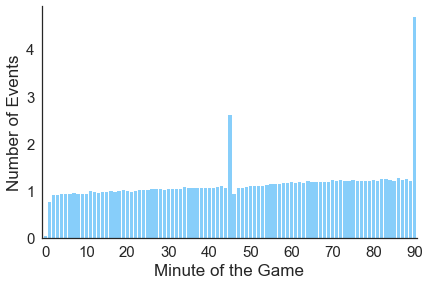

In [5]:
n = events['id_odsp'].nunique()

plt.bar(range(len(events.groupby('time').size())), events.groupby('time').size()/n, color='lightskyblue')

# temp = df.groupby('time_first_goal_scored')['comeback_draw'].mean()*100
# plt.bar(range(len(temp)), temp, color='b')

plt.xticks([10*x for x in range(10)],[10*x for x in range(10)])
#plt.yticks([10000*x for x in range(5)], [10*x for x in range(5)])
# plt.axvline(x=45, color='k', ls='dashed')
# plt.axvline(x=90, color='k', ls='dashed')
plt.xlim((-0.9,90.5))
seaborn.despine()
plt.ylabel('Number of Events', fontsize = 17)
plt.xlabel('Minute of the Game', fontsize = 17)
#plt.ylim((0,100))
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.savefig('number_of_events.png', dpi=200, frameon=False)



## for each unique game, get who scored first, the time they scored, and who won the game

### for each unique game get the time and side of the first goal

In [6]:
## the time of the first goal of each game

#for each game, get the minimum time of a goal event
first_goal_time =  pandas.DataFrame({'time' : events[events['is_goal']==1].groupby('id_odsp')['time'].min()})
first_goal_time.reset_index(inplace = True)

In [7]:
# join the time of the first goal back to the original dataset to get the side who scored

first_goal_time_side = pandas.merge(first_goal_time, events[events['is_goal']==1][['id_odsp','time','side']], on=['id_odsp', 'time'], how = 'inner')
first_goal_time_side.rename(columns={'side':'first_scored_side','time':'time_first_goal_scored'}, inplace=True)

In [8]:
first_goal_time_side.head()

,id_odsp,time_first_goal_scored,first_scored_side
0,004f4ING/,82,2
1,00LMl81F/,17,2
2,00QH2XdM/,14,1
3,00QL4t1L/,77,1
4,00WAhrVe/,28,2


In [9]:
## how many games are left in our new 'first_goal_time_side' dataset. i.e., how many games ended 0-0 and are excluded from our analysis
len(first_goal_time_side), events['id_odsp'].nunique(), len(first_goal_time_side)/events['id_odsp'].nunique()

(8366, 9074, 0.9219748732642715)

### get the winner of each game

In [10]:
## get the number of goals each side scored

#number of goals from the home side
home_side_goals = pandas.DataFrame({'num_goals_home' : events[events['is_goal']==1][events['side']==1].groupby('id_odsp').size()})
home_side_goals.reset_index(inplace = True)

#number of goals from the away side
away_side_goals = pandas.DataFrame({'num_goals_away' : events[events['is_goal']==1][events['side']==2].groupby('id_odsp').size()})
away_side_goals.reset_index(inplace = True)

#merge the two on the game id
num_goals = pandas.merge(home_side_goals, away_side_goals, on='id_odsp', how='outer') ##left join so that we 
num_goals.fillna(0, inplace = True)
num_goals.head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,id_odsp,num_goals_home,num_goals_away
0,00LMl81F/,2.0,3.0
1,00QH2XdM/,3.0,2.0
2,00QL4t1L/,2.0,0.0
3,00WAhrVe/,3.0,1.0
4,00Wld37M/,2.0,0.0


### determine the winning side. 0 if draw

In [11]:
def get_winner(n_home, n_away): ##get two numbers and return 0 if draw or the winning side
    if n_home == n_away:
        return 0
    elif n_home < n_away: #if the away team won
        return 2
    else:
        return 1

num_goals['winner'] = num_goals.apply(lambda x: get_winner(x['num_goals_home'], x['num_goals_away']), axis = 1)
num_goals.head()

,id_odsp,num_goals_home,num_goals_away,winner
0,00LMl81F/,2.0,3.0,2
1,00QH2XdM/,3.0,2.0,1
2,00QL4t1L/,2.0,0.0,1
3,00WAhrVe/,3.0,1.0,1
4,00Wld37M/,2.0,0.0,1


In [12]:
## who won most the games. We expect to see the home team winning more
num_goals.groupby('winner').size()

winner
0    1595
1    4189
2    2576
dtype: int64

### combine the first-goal dataset with the winning-side dataset

In [13]:
df = pandas.merge(num_goals, first_goal_time_side, on ='id_odsp', how = 'inner')
df.head()

,id_odsp,num_goals_home,num_goals_away,winner,time_first_goal_scored,first_scored_side
0,00LMl81F/,2.0,3.0,2,17,2
1,00QH2XdM/,3.0,2.0,1,14,1
2,00QL4t1L/,2.0,0.0,1,77,1
3,00WAhrVe/,3.0,1.0,1,28,2
4,00Wld37M/,2.0,0.0,1,45,1


### add binary variable indicating the result w.r.t. the team that scored first

In [14]:
# if the team that didn't score first won the game
df['lose'] = df.apply(lambda x: int(x['winner'] != x['first_scored_side'] and x['winner']!=0 ), axis =1 )

# if the team that didn't score first drew the game
df['draw'] = df.apply(lambda x: int(x['winner'] == 0 ), axis =1 )

# if the team that scored the first goal won the game
df['win'] = df.apply(lambda x: int( x['winner'] == x['first_scored_side'] ), axis =1 )

print(df['lose'].mean())
print(df['draw'].mean())
print(df['win'].mean())
df.head()

0.11761893377958403
0.1908917045182883
0.6914893617021277


,id_odsp,num_goals_home,num_goals_away,winner,time_first_goal_scored,first_scored_side,lose,draw,win
0,00LMl81F/,2.0,3.0,2,17,2,0,0,1
1,00QH2XdM/,3.0,2.0,1,14,1,0,0,1
2,00QL4t1L/,2.0,0.0,1,77,1,0,0,1
3,00WAhrVe/,3.0,1.0,1,28,2,1,0,0
4,00Wld37M/,2.0,0.0,1,45,1,0,0,1


## get the win percentage by time of the first goal scored

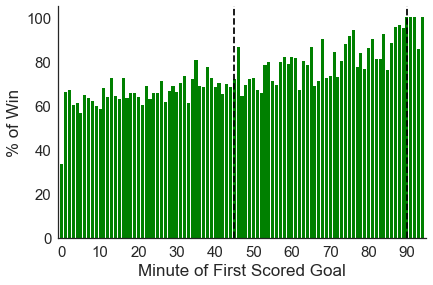

In [15]:
win = df.groupby('time_first_goal_scored')['win'].mean()*100
plt.bar(range(len(win)), win, color='green')

# temp = df.groupby('time_first_goal_scored')['comeback_draw'].mean()*100
# plt.bar(range(len(temp)), temp, color='b')

plt.xticks([10*x for x in range(10)],[10*x for x in range(10)])
plt.axvline(x=45, color='k', ls='dashed')
plt.axvline(x=90, color='k', ls='dashed')
plt.xlim((-0.9,95))
seaborn.despine()
plt.ylabel('% of Win', fontsize = 17)
plt.xlabel('Minute of First Scored Goal', fontsize = 17)
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.savefig('chance_of_win.png', dpi=200, frameon=False)

## get the losing percentage by time of first goal scored

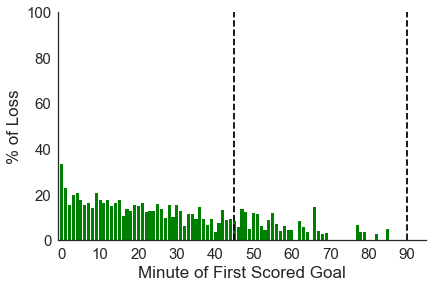

In [16]:
lose = df.groupby('time_first_goal_scored')['lose'].mean()*100

plt.bar(range(len(lose)), lose, color='green')

# temp = df.groupby('time_first_goal_scored')['comeback_draw'].mean()*100
# plt.bar(range(len(temp)), temp, color='b')

plt.xticks([10*x for x in range(10)],[10*x for x in range(10)])
plt.axvline(x=45, color='k', ls='dashed')
plt.axvline(x=90, color='k', ls='dashed')
plt.xlim((-0.9,95))
seaborn.despine()
plt.ylabel('% of Loss', fontsize = 17)
plt.xlabel('Minute of First Scored Goal', fontsize = 17)
plt.ylim((0,100))
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.savefig('chance_of_loss.png', dpi=200, frameon=False)

## get the draw probability 

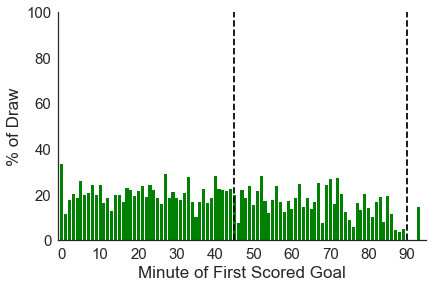

In [17]:
draw = df.groupby('time_first_goal_scored')['draw'].mean()*100

plt.bar(range(len(draw)), draw, color='green')

# temp = df.groupby('time_first_goal_scored')['comeback_draw'].mean()*100
# plt.bar(range(len(temp)), temp, color='b')

plt.xticks([10*x for x in range(10)],[10*x for x in range(10)])
plt.axvline(x=45, color='k', ls='dashed')
plt.axvline(x=90, color='k', ls='dashed')
plt.xlim((-0.9,95))
seaborn.despine()
plt.ylabel('% of Draw', fontsize = 17)
plt.xlabel('Minute of First Scored Goal', fontsize = 17)
plt.ylim((0,100))
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.savefig('chance_of_draw.png', dpi=200, frameon=False)

## all together

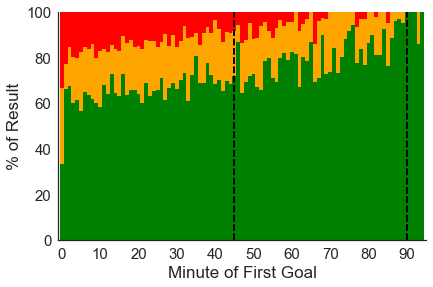

In [18]:
k = 1

p1 = plt.bar(range(len(win)), win, width = k, color = 'green')
p2 = plt.bar(range(len(draw)), draw, bottom = win, width = k, color = 'orange')
p3 = plt.bar(range(len(lose)), lose, bottom= win + draw, width = k, color = 'red')
plt.axvline(x=45, ls='dashed', color='k')
plt.axvline(x=90, ls='dashed', color='k')
plt.xlim((-1,95))

plt.xticks([10*x for x in range(10)],[10*x for x in range(10)])
plt.axvline(x=45, color='k', ls='dashed')
plt.axvline(x=90, color='k', ls='dashed')
plt.xlim((-0.9,95))
seaborn.despine()
plt.ylabel('% of Result', fontsize = 17)
plt.xlabel('Minute of First Goal', fontsize = 17)
plt.ylim((0,100))
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.savefig('chance_of_result.png', dpi=200, frameon=False)

## add sample size to each bad plot

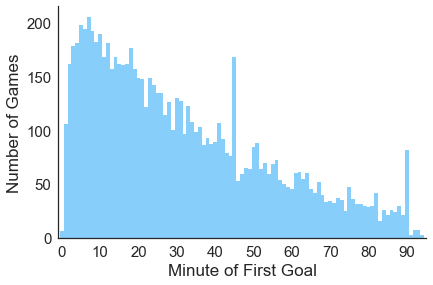

In [19]:
temp = df.groupby('time_first_goal_scored').size()

k = 1

p1 = plt.bar(range(len(temp)), temp, width = k, color = 'lightskyblue')
#plt.axvline(x=45, ls='dashed', color='k')
#plt.axvline(x=90, ls='dashed', color='k')
plt.xlim((-1,95))

plt.xticks([10*x for x in range(10)],[10*x for x in range(10)])

plt.xlim((-0.9,95))
seaborn.despine()
plt.ylabel('Number of Games', fontsize = 17)
plt.xlabel('Minute of First Goal', fontsize = 17)
#plt.ylim((0,100))
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.savefig('number_of_games.png', dpi=200, frameon=False)

## bar plot with the bar weights

In [20]:
def norm(x,size):
    min_ = size.max()
    max_ = size.min()
    mean_ = size.mean()

    return (x-min_)/float(max_-min_)

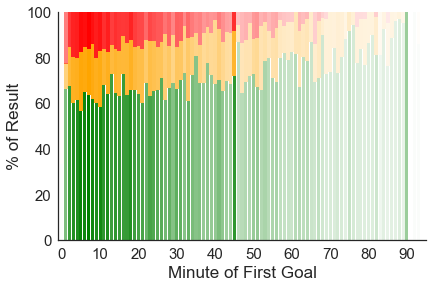

In [21]:
win = df.groupby('time_first_goal_scored')['win'].mean()*100
draw = df.groupby('time_first_goal_scored')['draw'].mean()*100
lose = df.groupby('time_first_goal_scored')['lose'].mean()*100

size = df.groupby('time_first_goal_scored').size()

for i in range(len(win)):
    plt.bar(range(i,i+1), win[i], color='green', alpha=1-norm(size[i],size))
    plt.bar(range(i,i+1), draw[i], bottom = win[i], width = k, color = 'orange', alpha=1-norm(size[i],size))
    p3 = plt.bar(range(i,i+1), lose[i], bottom= win[i] + draw[i], width = k, color = 'red', alpha=1-norm(size[i],size))
    
plt.xticks([10*x for x in range(10)],[10*x for x in range(10)])
# plt.axvline(x=45, color='k', ls='dashed')
# plt.axvline(x=90, color='k', ls='dashed')
plt.xlim((-0.9,95))
seaborn.despine()
plt.ylabel('% of Result', fontsize = 17)
plt.xlabel('Minute of First Goal', fontsize = 17)
plt.ylim((0,100))
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.savefig('chance_of_result_weighted.png', dpi=200, frameon=False)

In [22]:
size[20], size[76]

(149, 36)

## average data

In [23]:
## average probability of each result, if you score first
df['win'].mean(),df['lose'].mean(),df['draw'].mean()

(0.6914893617021277, 0.11761893377958403, 0.1908917045182883)

In [24]:
## average probability of each result, if you score first in each half
print('first half:', df[df['time_first_goal_scored']<46]['win'].mean(),df[df['time_first_goal_scored']<46]['lose'].mean(),df[df['time_first_goal_scored']<46]['draw'].mean())

## average probability of each result, if you score first in each half
print('second half:', df[df['time_first_goal_scored']>45]['win'].mean(),df[df['time_first_goal_scored']>45]['lose'].mean(),df[df['time_first_goal_scored']>45]['draw'].mean())

first half: 0.6585326953748006 0.14066985645933014 0.20079744816586922
second half: 0.7900763358778626 0.04866412213740458 0.16125954198473283


## join with game metadata

In [25]:
ginf = pandas.read_csv('ginf.csv')
ginf.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [26]:
df_info = pandas.merge(df, ginf[['id_odsp', 'league', 'country','season']], on='id_odsp', how='inner')